In [1]:
import chess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap
from sklearn.linear_model import LinearRegression

from p4_generate_dataset import SAMPLE_ELOS

C:\Users\Philipp\Documents\Code\chess\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Saved enriched dataset to 'data/stats_dataset.parquet'


In [2]:
df = pd.read_parquet("../data/stats_dataset.parquet")
df.head()

,fen,next_move,avg_elo,global_winrate,count,engine_move,fragility_score,delta,variance,score_base,...,recommended_move_2200,is_best_2200,is_engine_best_2200,frag_rec_2200,is_frag_best_2200,delta_rec_2200,is_delta_best_2200,mix_score_2200,mix_rec_2200,is_mix_best_2200
0,2kr1bnr/ppp1pppp/2n5/3q4/6b1/5N2/PPPPBPPP/RNBQ...,b1c3,1837.177419,0.451613,62,h2h3,0.643006,0.796763,0.995435,0.811734,...,b1c3,True,False,b1c3,True,b1c3,True,0.796763,b1c3,True
1,2kr1bnr/pppbpppp/2n1q3/8/8/2N2N2/PPPPBPPP/R1BQ...,f1e1,1400.066667,0.550000,60,d2d4,0.421480,0.760791,0.991851,0.724708,...,f1e1,True,False,f1e1,True,f1e1,True,0.760791,f1e1,True
2,r1b1kb1r/ppp1pppp/2n1qn2/8/8/2N2N2/PPPPBPPP/R1...,d2d4,1296.660714,0.625000,112,d2d4,0.000000,0.893885,0.973859,0.622581,...,d2d4,True,True,e1g1,False,d2d4,True,0.893885,d2d4,True
3,r1b1kb1r/ppp1pppp/2n1qn2/8/8/2N2N2/PPPPBPPP/R1...,e1g1,1317.025455,0.603636,275,d2d4,0.000000,0.820144,0.990104,0.603416,...,d2d4,True,True,e1g1,False,d2d4,True,0.820144,d2d4,True
4,r1b1kb1r/ppp1pppp/2n2n2/3q4/8/5N2/PPPPBPPP/RNB...,e1g1,1626.631579,0.438596,57,e1g1,0.299516,0.892086,0.997221,0.729608,...,e1g1,True,True,e1g1,True,e1g1,True,0.892086,e1g1,True


In [3]:
df.describe()

,avg_elo,global_winrate,count,fragility_score,delta,variance,score_base,winrate_500,score_500,mix_score_500,...,mix_score_850,winrate_1200,score_1200,mix_score_1200,winrate_1500,score_1500,mix_score_1500,winrate_2200,score_2200,mix_score_2200
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,1532.871038,0.476793,531.174897,0.811931,0.827412,0.979915,0.873086,0.132313,0.873086,0.819672,...,0.819672,0.471575,0.873086,0.821220,0.480479,0.873086,0.823542,0.402570,0.873086,0.827412
std,188.159047,0.081600,2980.339144,0.171884,0.109234,0.066805,0.075607,0.301689,0.075607,0.101209,...,0.101209,0.153756,0.075607,0.094350,0.105495,0.075607,0.092000,0.312500,0.075607,0.109234
min,1128.297297,0.040000,50.000000,0.000000,0.000000,0.000000,0.413675,0.000000,0.413675,0.410072,...,0.410072,0.000000,0.413675,0.341830,0.000000,0.413675,0.213644,0.000000,0.413675,0.000000
25%,1377.616828,0.430551,65.000000,0.716848,0.791817,0.989205,0.840134,0.000000,0.840134,0.770878,...,0.770878,0.388889,0.840134,0.781953,0.421053,0.840134,0.788138,0.000000,0.840134,0.791817
50%,1530.909284,0.479279,105.000000,0.857526,0.863309,0.997178,0.893625,0.000000,0.893625,0.844602,...,0.844602,0.473684,0.893625,0.840441,0.480000,0.893625,0.847052,0.428571,0.893625,0.863309
75%,1692.551379,0.519960,208.250000,0.945841,0.892086,0.999089,0.928175,0.000000,0.928175,0.895471,...,0.895471,0.545982,0.928175,0.887348,0.533381,0.928175,0.882834,0.569876,0.928175,0.892086
max,1963.800000,0.941176,35816.000000,1.000000,1.000000,1.000000,0.969981,1.000000,0.969981,0.955912,...,0.955912,1.000000,0.969981,0.964730,1.000000,0.969981,0.977956,1.000000,0.969981,1.000000


In [4]:
results = []
grouped = df.groupby("fen").first().reset_index()

for elo in SAMPLE_ELOS:
    is_best_col = f"is_best_{elo}"
    is_engine_col = f"is_engine_best_{elo}"
    is_frag_col = f"is_frag_best_{elo}"
    is_delta_col = f"is_delta_best_{elo}"
    is_mix_col = f"is_mix_best_{elo}"

    avg_is_best = grouped[is_best_col].mean()
    avg_is_engine_best = grouped[is_engine_col].mean()
    avg_is_frag_best = grouped[is_frag_col].mean()
    avg_is_delta_best = grouped[is_delta_col].mean()
    avg_is_mix_best = grouped[is_mix_col].mean()

    results.append({
        "elo": elo,
        "avg_is_best": avg_is_best,
        "avg_is_engine_best": avg_is_engine_best,
        "avg_is_frag_best": avg_is_frag_best,
        "avg_is_delta_best": avg_is_delta_best,
        "avg_is_mix_best": avg_is_mix_best,
    })

pd.DataFrame(results)

,elo,avg_is_best,avg_is_engine_best,avg_is_frag_best,avg_is_delta_best,avg_is_mix_best
0,500,0.751004,0.389558,0.931727,0.746988,0.746988
1,850,0.763052,0.405622,0.763052,0.763052,0.763052
2,1200,0.775100,0.401606,0.751004,0.759036,0.759036
3,1500,0.779116,0.417671,0.730924,0.783133,0.783133
4,2200,0.779116,0.393574,0.779116,0.767068,0.767068


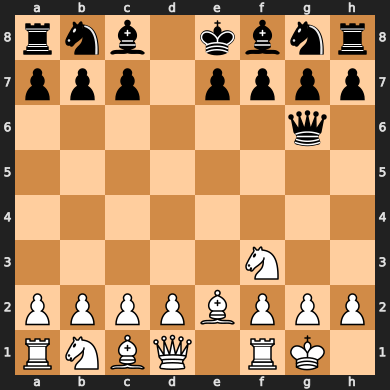

In [5]:
random_fen = df["fen"].sample(1).iloc[0]
filtered = df[df["fen"] == random_fen]
chess.Board(random_fen)

In [6]:
filtered

,fen,next_move,avg_elo,global_winrate,count,engine_move,fragility_score,delta,variance,score_base,...,recommended_move_2200,is_best_2200,is_engine_best_2200,frag_rec_2200,is_frag_best_2200,delta_rec_2200,is_delta_best_2200,mix_score_2200,mix_rec_2200,is_mix_best_2200
275,rnb1kbnr/ppp1pppp/6q1/8/8/5N2/PPPPBPPP/RNBQ1RK...,c8h3,1508.085714,0.571429,70,c8h3,0.730123,0.913669,0.992721,0.878838,...,c8h3,True,True,c8h3,True,c8h3,True,0.913669,c8h3,True


# Regression Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 75 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fen                    486 non-null    object 
 1   next_move              486 non-null    object 
 2   avg_elo                486 non-null    float64
 3   global_winrate         486 non-null    float64
 4   count                  486 non-null    int64  
 5   engine_move            486 non-null    object 
 6   fragility_score        486 non-null    float64
 7   delta                  486 non-null    float64
 8   variance               486 non-null    float64
 9   score_base             486 non-null    float64
 10  winrate_500            486 non-null    float64
 11  historical_best_500    486 non-null    object 
 12  score_500              486 non-null    float64
 13  recommended_move_500   486 non-null    object 
 14  is_best_500            486 non-null    bool   
 15  is_eng

In [8]:
# df["f_cross_d"] = df["fragility_score"] * df["delta"]
# df["f_cross_v"] = df["fragility_score"] * df["variance"]
# df["d_cross_v"] = df["delta"] * df["variance"]

selected_features = ["fragility_score", "delta", "variance", "score_base"] #"f_cross_d", "f_cross_v", "d_cross_v", ]
X = df[selected_features]
y = df["is_best_1500"]

In [9]:
model = LinearRegression()
model.fit(X, y)

for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")

fragility_score: -0.260
delta: 0.756
variance: -0.140
score_base: 0.119


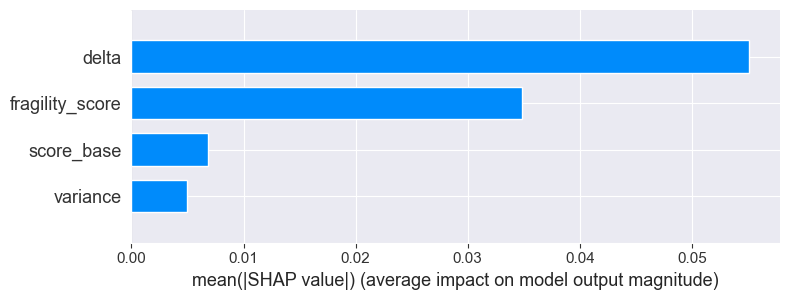

In [10]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, plot_type="bar")

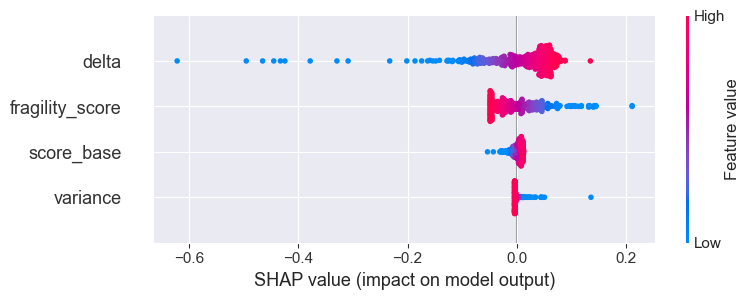

In [11]:
shap.summary_plot(shap_values, X, show=True)

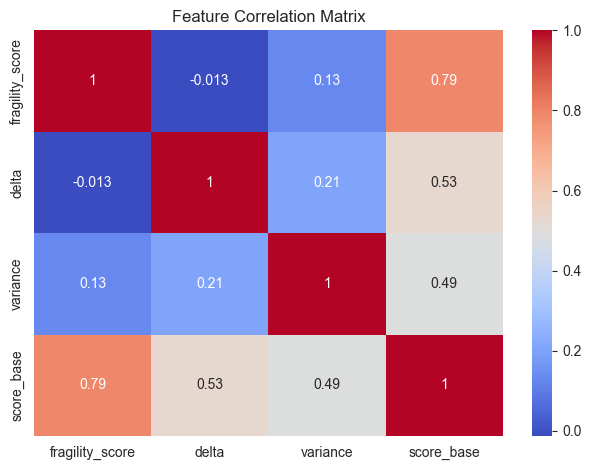

In [12]:
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()